In [1]:
import gc
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def get_files_names(path):
    files_name = glob.glob(path)
    return files_name


path = "../../../../truth/signal/*.npz"
files_name = get_files_names(path)
print(files_name)


def get_data(path):
    try:
        with np.load(path, allow_pickle=True) as f:
            data_dict = {name: f[name] for name in f.files}
            return pd.DataFrame(data_dict)
    except FileNotFoundError:
        print("File not found!")
        return pd.DataFrame()


files = []
files_name.sort()
for f in files_name:
    files.append(get_data(f))

# need to check the order of data name.
print(files_name)

# need to follow the order of data name.
(
    CGLMP,
    Higgs,
    LeadLep,
    LepM,
    LepP,
    NuM,
    NuP,
    MET,
    Wm,
    Wp,
    diLep,
    SubLep,
    Xi,
) = files

del files_name, files
gc.collect()

['../../../../truth/signal/LeptonP.npz', '../../../../truth/signal/subLeadLepton.npz', '../../../../truth/signal/CGLMP.npz', '../../../../truth/signal/xi_xyz.npz', '../../../../truth/signal/diLepton.npz', '../../../../truth/signal/LeadLepton.npz', '../../../../truth/signal/MET.npz', '../../../../truth/signal/Higgs.npz', '../../../../truth/signal/WmBoson.npz', '../../../../truth/signal/LpNu.npz', '../../../../truth/signal/LmNu.npz', '../../../../truth/signal/LeptonM.npz', '../../../../truth/signal/WpBoson.npz']
['../../../../truth/signal/CGLMP.npz', '../../../../truth/signal/Higgs.npz', '../../../../truth/signal/LeadLepton.npz', '../../../../truth/signal/LeptonM.npz', '../../../../truth/signal/LeptonP.npz', '../../../../truth/signal/LmNu.npz', '../../../../truth/signal/LpNu.npz', '../../../../truth/signal/MET.npz', '../../../../truth/signal/WmBoson.npz', '../../../../truth/signal/WpBoson.npz', '../../../../truth/signal/diLepton.npz', '../../../../truth/signal/subLeadLepton.npz', '../../

253

In [71]:
# Some constants
GEV = 1e3
# RMV_EVT = [638488, 835579, 2168342] # escape some mathmetical errors.
RMV_EVT = []  # escape some mathmetical errors.

In [72]:
# Kinemetic info of leptons.
lep_kin = (
    pd.DataFrame(
        {
            "lep_p_E": LepP["E"],
            "lep_p_px": LepP["px"],
            "lep_p_py": LepP["py"],
            "lep_p_pz": LepP["pz"],
            "lep_m_E": LepM["E"],
            "lep_m_px": LepM["px"],
            "lep_m_py": LepM["py"],
            "lep_m_pz": LepM["pz"],
        }
    )
    / GEV
)

# check format l+ -> (E, px, py, pz); then, append l- with the same format of l+.
print(lep_kin.shape)
lep_kin.drop(RMV_EVT, inplace=True)
print(lep_kin.shape)
lep_kin.head(5)

(2928862, 8)
(2928862, 8)


,lep_p_E,lep_p_px,lep_p_py,lep_p_pz,lep_m_E,lep_m_px,lep_m_py,lep_m_pz
0,19.465703,-5.065763,16.360542,-9.250574,12.031222,11.081455,2.673936,-3.847299
1,131.817141,8.901175,2.966260,131.482766,66.401992,-13.096559,14.755815,63.403242
2,94.193734,-3.040100,49.431305,80.123430,26.267500,7.589698,1.677931,25.090863
3,165.226891,4.702402,-19.638676,163.988219,36.290188,0.038865,20.284725,30.091441
4,6.403636,5.808921,-2.135702,-1.643704,32.603137,11.729594,30.418752,0.263776


In [73]:
# # Kinemetic info of neutirnos.
# nu_kin = pd.DataFrame({
#     'nu_p_E' : NuP['E'],
#     'nu_p_px': NuP['px'],
#     'nu_p_py': NuP['py'],
#     'nu_p_pz': NuP['pz'],
#     'nu_m_E' : NuM['E'],
#     'nu_m_px': NuM['px'],
#     'nu_m_py': NuM['py'],
#     'nu_m_pz': NuM['pz'],
# })/GEV

# # check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
# print(nu_kin.shape)
# nu_kin.drop(RMV_EVT, inplace=True)
# print(nu_kin.shape)
# nu_kin.head(5)

In [74]:
# Kinemetic info of neutirnos.
nu_kin = (
    pd.DataFrame(
        {
            "di_nu_E": np.sqrt(
                np.square(34141 * np.ones(len(MET)))
                + np.square(MET["px"])
                + np.square(MET["py"])
            ),
            "di_nu_px": MET["px"],
            "di_nu_py": MET["py"],
            "di_nu_pz": np.zeros(len(MET)),
        }
    )
    / GEV
)

# check format nu+ -> (E, px, py, pz); then, append nu- with the same format of l+.
print(nu_kin.shape)
nu_kin.drop(RMV_EVT, inplace=True)
print(nu_kin.shape)
nu_kin.head(5)

(2928862, 4)
(2928862, 4)


,di_nu_E,di_nu_px,di_nu_py,di_nu_pz
0,71.206550,21.531590,58.661363,0.0
1,151.259677,142.831582,-36.235636,0.0
2,63.692578,-4.344014,-53.593527,0.0
3,43.088260,-19.836591,-17.248187,0.0
4,48.557778,-21.864079,-26.724745,0.0


In [75]:
# CGLMP.
CGLMP = pd.DataFrame(
    {
        "Bxy": CGLMP["Bxy"],
        "Byz": CGLMP["Byz"],
        "Bzx": CGLMP["Bzx"],
    }
)

# check
print(CGLMP.shape)
CGLMP.drop(RMV_EVT, inplace=True)
print(CGLMP.shape)
CGLMP.head(5)

(2928862, 3)
(2928862, 3)


,Bxy,Byz,Bzx
0,5.379610,-0.375224,8.00803
1,-4.331580,15.150000,-5.99553
2,4.612100,21.715400,19.46050
3,-12.159800,-1.537670,-5.16628
4,-0.905081,24.782200,6.81644


In [76]:
import tensorflow as tf

print(tf.config.list_physical_devices(), "\n")
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
from lbn import LBN, LBNLayer

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')] 

2.13.0


29.6186 -25.1056
std: 11.919078406223935
mean: 2.2136772085042526
Tot evt: 2928862


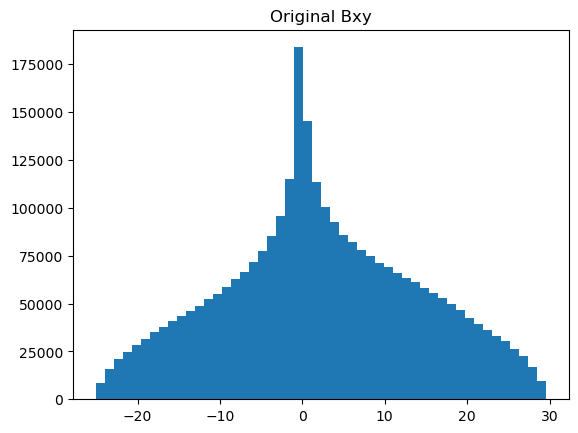

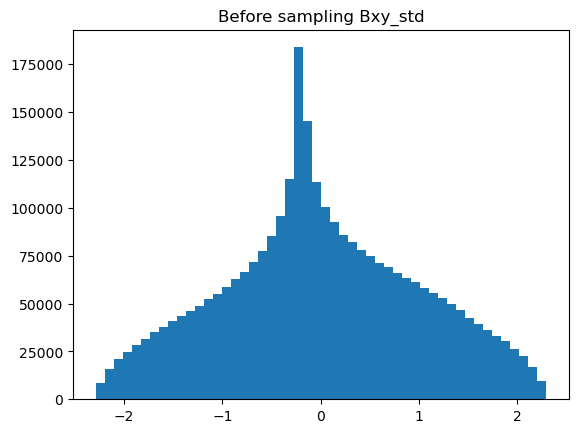

2.299248862698251 -2.292063273788311
std: 1.0000000000000007
Tot evt: 2928862


In [77]:
plt.hist(CGLMP["Bxy"], bins=50)
plt.title("Original Bxy")
print(CGLMP["Bxy"].max(), CGLMP["Bxy"].min())
print("std:", CGLMP["Bxy"].std())
print("mean:", CGLMP["Bxy"].mean())
print("Tot evt:", len(CGLMP["Bxy"]))
plt.show()
plt.close()

from sklearn.preprocessing import StandardScaler

SCALAR = StandardScaler()
Bxy_std = SCALAR.fit_transform(
    [[x] for x in CGLMP["Bxy"]]
).flatten()  # zero mean and unit variance
plt.hist(Bxy_std, bins=50)
plt.title("Before sampling Bxy_std")
plt.show()
plt.close()
print(Bxy_std.max(), Bxy_std.min())
print("std:", Bxy_std.std())
print("Tot evt:", len(Bxy_std))

In [78]:
# Undersampling to an uniform distribution

n = int(1e2)
step = (Bxy_std.max() - Bxy_std.min()) / n
intervals = [Bxy_std.min() + i * step for i in range(n)]

sampling = int(1e3)
indices_arr = np.empty((n - 1, sampling), dtype=int)
for i in range(n - 1):
    try:
        indices_arr[i] = np.random.choice(
            np.where((intervals[i] < Bxy_std) * (Bxy_std <= intervals[i + 1]))[0],
            size=sampling,
            replace=False,
        )
    except ValueError:
        print("Cannot take a larger sample than population when 'replace=False")
        break

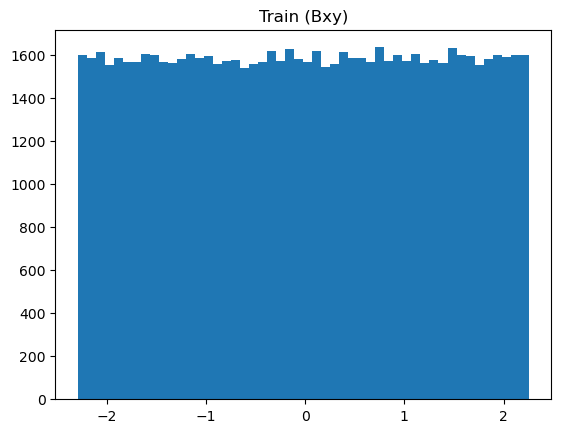

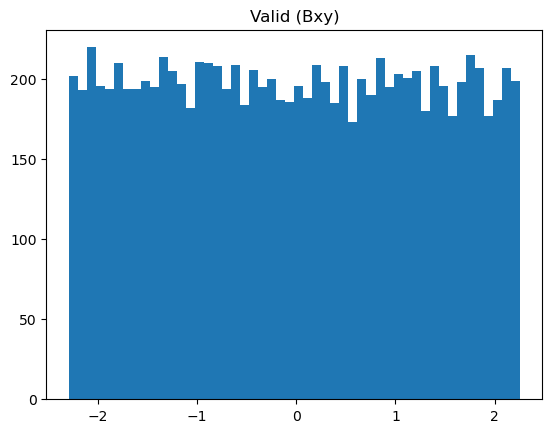

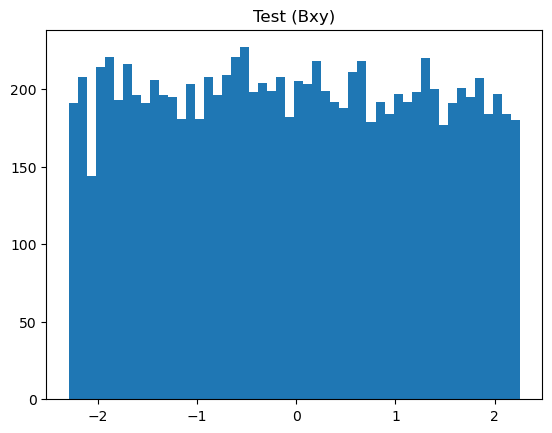

Training data shape: (79200, 3, 4)
Testing data shape: (9900, 3, 4)
Validation data shape: (9900, 3, 4)
None


24232

In [79]:
from sklearn.model_selection import train_test_split

lepton_features = [
    "lep_p_E",
    "lep_p_px",
    "lep_p_py",
    "lep_p_pz",
    "lep_m_E",
    "lep_m_px",
    "lep_m_py",
    "lep_m_pz",
]
neutrino_features = ["di_nu_E", "di_nu_px", "di_nu_py", "di_nu_pz"]


def reshape_features_lep(inputs, features):
    outputs = np.stack([inputs[features[0:4]], inputs[features[4:8]]], axis=1)
    return outputs


def reshape_features_dinu(inputs, features):
    outputs = np.expand_dims(inputs[features[0::]].to_numpy(), axis=1)
    return outputs


train_indices, temp_indices = train_test_split(
    indices_arr.flatten(), train_size=0.8, test_size=0.2, random_state=42
)
valid_indices, test_indices = train_test_split(
    temp_indices, train_size=0.5, test_size=0.5, random_state=42
)

lep_train = reshape_features_lep(lep_kin.iloc[train_indices], lepton_features)
lep_valid = reshape_features_lep(lep_kin.iloc[valid_indices], lepton_features)
lep_test = reshape_features_lep(lep_kin.iloc[test_indices], lepton_features)

nu_train = reshape_features_dinu(nu_kin.iloc[train_indices], neutrino_features)
nu_valid = reshape_features_dinu(nu_kin.iloc[valid_indices], neutrino_features)
nu_test = reshape_features_dinu(nu_kin.iloc[test_indices], neutrino_features)

Bxy_train = Bxy_std[train_indices]
Bxy_valid = Bxy_std[valid_indices]
Bxy_test = Bxy_std[test_indices]
plt.hist(Bxy_train, bins=50)
plt.title("Train (Bxy)")
plt.show()
plt.hist(Bxy_valid, bins=50)
plt.title("Valid (Bxy)")
plt.show()
plt.hist(Bxy_test, bins=50)
plt.title("Test (Bxy)")
plt.show()


def stack_parts(input1, input2):
    outputs = np.concatenate([input1, input2], axis=1)
    return outputs


# print(f'Training data shape: {lep_train.shape}\nTesting data shape: {lep_test.shape}\nValidation data shape: {lep_valid.shape}')
train = stack_parts(lep_train, nu_train)
valid = stack_parts(lep_valid, nu_valid)
test = stack_parts(lep_test, nu_test)

print(
    print(
        f"Training data shape: {train.shape}\nTesting data shape: {test.shape}\nValidation data shape: {valid.shape}"
    )
)

del (
    train_indices,
    temp_indices,
    valid_indices,
    test_indices,
    lep_train,
    lep_valid,
    lep_test,
    nu_train,
    nu_valid,
    nu_test,
)
gc.collect()

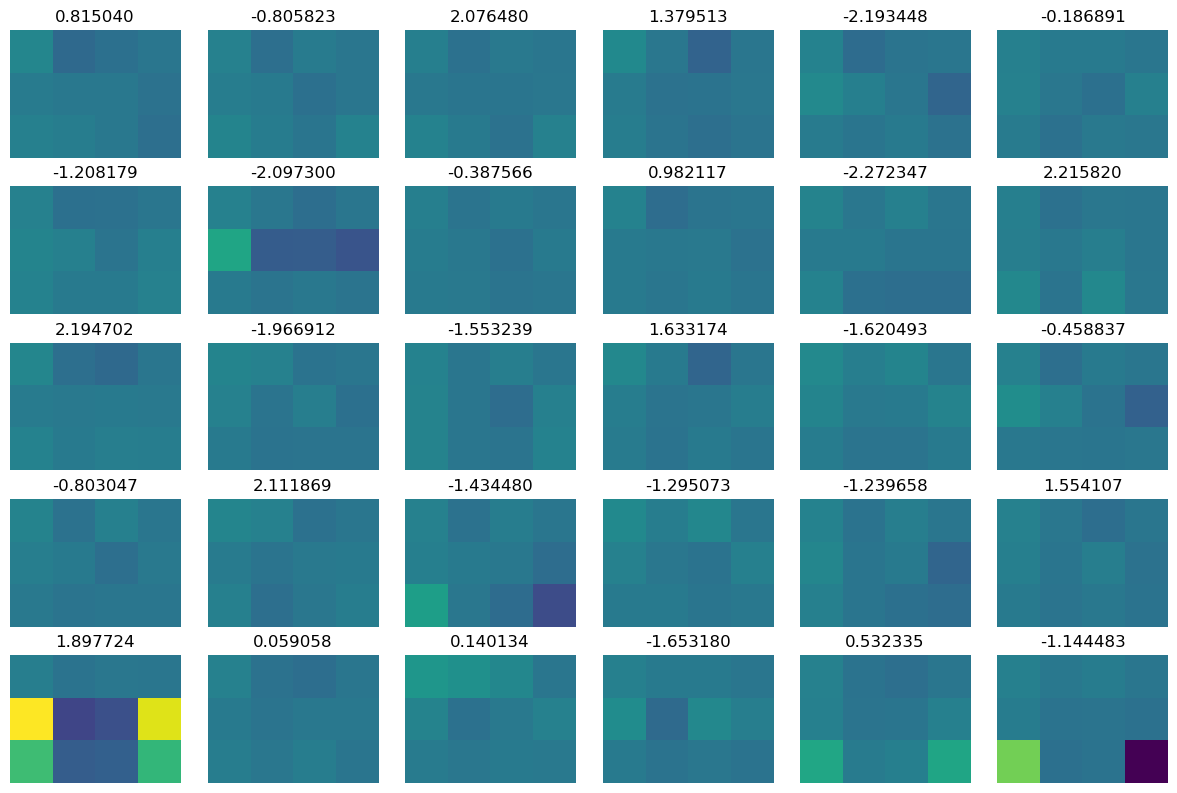

In [80]:
# Create random data for 50 figures (4x4 matrices)
num_figures = 30

# Calculate the grid dimensions (rows x columns)
num_rows = 5
num_cols = 6

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the figures and plot them on subplots
for i, ax in enumerate(axes):
    ax.imshow(
        train[i],
        cmap="viridis",
        origin="lower",
        vmin=train[0 : num_figures + 1].min(),
        vmax=train[0 : num_figures + 1].max(),
    )
    ax.set_title(f"{Bxy_train[i]:2f}")
    ax.axis("off")  # Turn off axis labels
plt.tight_layout()
plt.show()

### Model define


In [119]:
def build_model(lbn=True):
    # define model
    model = keras.models.Sequential()

    # use LBN layer or not
    input_shape = (3, 4)  # 3 particles with 4 vector
    if lbn == True:
        N_combinations = 3  # number of composite particles/rest frames
        model.add(
            LBNLayer(
                input_shape,
                N_combinations,
                boost_mode=LBN.PAIRS,
                # features=['E', 'beta', 'eta', 'gamma', 'm', 'p', 'pair_cos', 'pair_dr', 'pair_ds', 'pair_dy', 'phi', 'pt', 'px', 'py', 'pz']
                features=["px", "py", "pz", "E", "pt", "eta", "phi", "m"],
            )
        )
        print("Use LBN layer...")
    else:
        model.add(layers.Flatten(input_shape=input_shape))
        print("Not using LBN layer...")

    # Simple DNN hidden layers
    model.add(layers.Dense(units=32, activation="elu"))
    model.add(layers.Dense(units=32, activation="elu"))
    model.add(layers.Dense(units=32, activation="elu"))

    # Last dense layer
    model.add(layers.Dense(units=1, activation="linear"))

    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="mse")
    model.summary()

    return model


model = build_model(lbn=True)

Use LBN layer...
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LBN (LBNLayer)              (None, 24)                18        
                                                                 
 dense_60 (Dense)            (None, 32)                800       
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2963 (11.57 KB)
Trainable params: 2963 (11.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
# Fit the model
stop_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
history = model.fit(
    x=train,
    y=Bxy_train,
    validation_data=(valid, Bxy_valid),
    epochs=100,
    batch_size=512,
    callbacks=stop_early,
    verbose=2,
)
print("\nFinish!")

Epoch 1/100
155/155 - 3s - loss: 2.7988 - val_loss: 1.6799 - 3s/epoch - 20ms/step
Epoch 2/100
155/155 - 1s - loss: 1.6119 - val_loss: 1.5595 - 1s/epoch - 7ms/step
Epoch 3/100
155/155 - 1s - loss: 1.5305 - val_loss: 1.5246 - 1s/epoch - 6ms/step
Epoch 4/100
155/155 - 1s - loss: 1.4830 - val_loss: 1.4667 - 1s/epoch - 7ms/step
Epoch 5/100
155/155 - 1s - loss: 1.4646 - val_loss: 1.4419 - 1000ms/epoch - 6ms/step
Epoch 6/100
155/155 - 1s - loss: 1.4560 - val_loss: 1.4715 - 968ms/epoch - 6ms/step
Epoch 7/100
155/155 - 1s - loss: 1.4564 - val_loss: 1.4483 - 986ms/epoch - 6ms/step
Epoch 8/100
155/155 - 1s - loss: 1.4336 - val_loss: 1.4182 - 995ms/epoch - 6ms/step
Epoch 9/100
155/155 - 1s - loss: 1.4223 - val_loss: 1.4369 - 987ms/epoch - 6ms/step
Epoch 10/100
155/155 - 1s - loss: 1.4168 - val_loss: 1.4346 - 986ms/epoch - 6ms/step
Epoch 11/100
155/155 - 1s - loss: 1.4081 - val_loss: 1.4044 - 979ms/epoch - 6ms/step
Epoch 12/100
155/155 - 1s - loss: 1.4154 - val_loss: 1.4518 - 1s/epoch - 7ms/step
Ep

In [121]:
Bxy_pred = model.predict(test)

310/310 [==============================] - 1s 2ms/step


In [122]:
from sklearn.metrics import mean_squared_error


def calculate_rmse(pred, test):
    return np.sqrt(mean_squared_error(test, pred))


def plot_2d_histogram(pred, test, bins=50):
    # Create the 2D histogram with specified bins
    hist, xedges, yedges = np.histogram2d(pred.flatten(), test, bins=(bins, bins))

    # Create a masked array to set empty regions to the specified color
    hist = np.ma.masked_where(hist == 0, hist)

    # Plot the 2D histogram with the specified color for empty regions
    fig = plt.figure(figsize=(8, 6), dpi=120)
    plt.pcolormesh(xedges, yedges, hist.T, cmap="viridis")
    cbar = plt.colorbar()
    cbar.set_label("Frequency")
    # min_scl = np.min([np.min(pred), np.min(test)])
    # max_scl = np.max([np.max(pred), np.max(test)])
    # plt.xlim([min_scl, max_scl])
    # plt.ylim([min_scl, max_scl])
    plt.xlim([-2.3, 2.3])
    plt.ylim([-2.3, 2.3])
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.show()
    plt.close()


def plot_loss_history(history):
    fig = plt.figure(figsize=(8, 5), dpi=120)
    plt.plot(history.history["loss"], lw=2.5, label="Train", alpha=0.8)
    plt.plot(history.history["val_loss"], lw=2.5, label="Validation", alpha=0.8)
    plt.semilogy()
    plt.title("Epoch vs MSE")
    plt.xlabel("epoch")
    plt.ylabel("Loss (MSE)")
    plt.legend(loc="best")
    plt.show()
    plt.close()

RMSE: 1.1307584202080547
MAX of pred: 1.8253976106643677; MIN of pred: -1.4128772020339966
MAX of test: 2.252500273912114; MIN of test: -2.2906957181579917


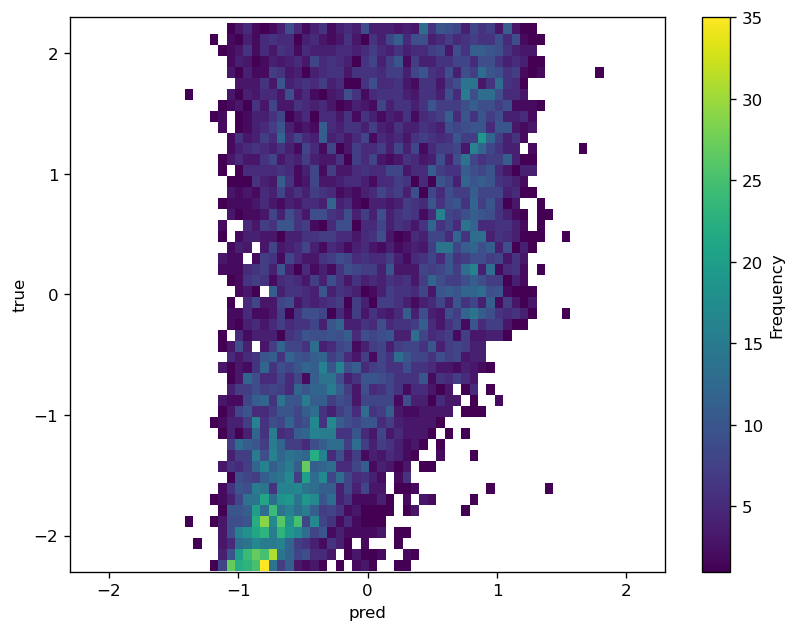

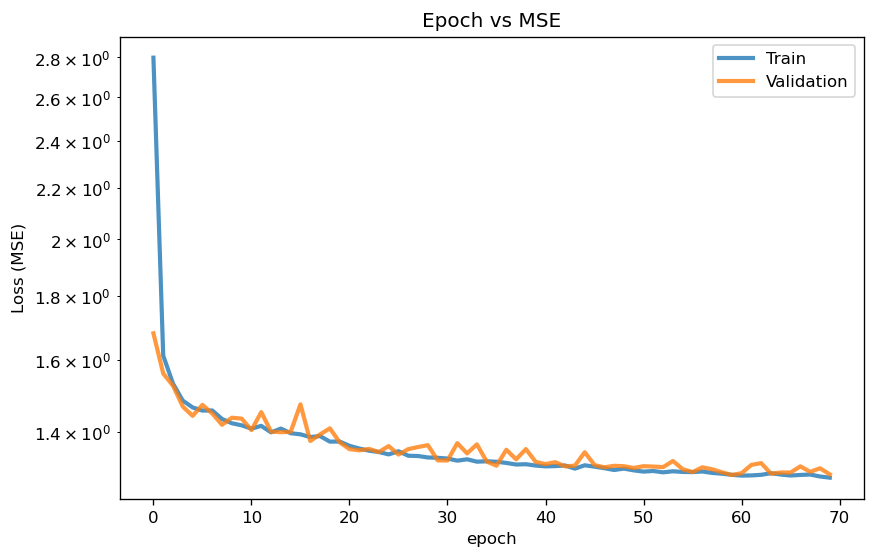

In [123]:
# Calculate RMSE and print statistics
rmse = calculate_rmse(Bxy_pred, Bxy_test)
print(f"RMSE: {rmse}")
print(f"MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}")
print(f"MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}")

# Plot the 2D histogram
plot_2d_histogram(Bxy_pred, Bxy_test, bins=50)

# Plot the loss history
plot_loss_history(history)

In [124]:
# Define model without LBN layer
model = build_model(lbn=False)

# Fit the model
stop_early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
history = model.fit(
    x=train,
    y=Bxy_train,
    validation_data=(valid, Bxy_valid),
    epochs=100,
    batch_size=256,
    callbacks=stop_early,
    verbose=2,
)
print("\nFinish!")

Bxy_pred = model.predict(test)

Not using LBN layer...
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 12)                0         
                                                                 
 dense_64 (Dense)            (None, 32)                416       
                                                                 
 dense_65 (Dense)            (None, 32)                1056      
                                                                 
 dense_66 (Dense)            (None, 32)                1056      
                                                                 
 dense_67 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________________________

Epoch 1/100
310/310 - 2s - loss: 74.1491 - val_loss: 3.6903 - 2s/epoch - 7ms/step
Epoch 2/100
310/310 - 1s - loss: 3.0145 - val_loss: 2.5058 - 908ms/epoch - 3ms/step
Epoch 3/100
310/310 - 1s - loss: 2.3318 - val_loss: 2.1574 - 934ms/epoch - 3ms/step
Epoch 4/100
310/310 - 1s - loss: 2.0870 - val_loss: 2.0215 - 926ms/epoch - 3ms/step
Epoch 5/100
310/310 - 1s - loss: 1.9667 - val_loss: 1.9075 - 911ms/epoch - 3ms/step
Epoch 6/100
310/310 - 1s - loss: 1.8806 - val_loss: 1.8712 - 914ms/epoch - 3ms/step
Epoch 7/100
310/310 - 1s - loss: 1.8376 - val_loss: 1.8608 - 924ms/epoch - 3ms/step
Epoch 8/100
310/310 - 1s - loss: 1.7915 - val_loss: 1.8888 - 841ms/epoch - 3ms/step
Epoch 9/100
310/310 - 1s - loss: 1.7526 - val_loss: 1.7814 - 915ms/epoch - 3ms/step
Epoch 10/100
310/310 - 1s - loss: 1.7444 - val_loss: 1.7491 - 940ms/epoch - 3ms/step
Epoch 11/100
310/310 - 1s - loss: 1.7104 - val_loss: 1.8048 - 897ms/epoch - 3ms/step
Epoch 12/100
310/310 - 1s - loss: 1.6977 - val_loss: 1.7457 - 926ms/epoch - 

RMSE: 1.1805553659098025
MAX of pred: 1.731506586074829; MIN of pred: -1.7773363590240479
MAX of test: 2.252500273912114; MIN of test: -2.2906957181579917


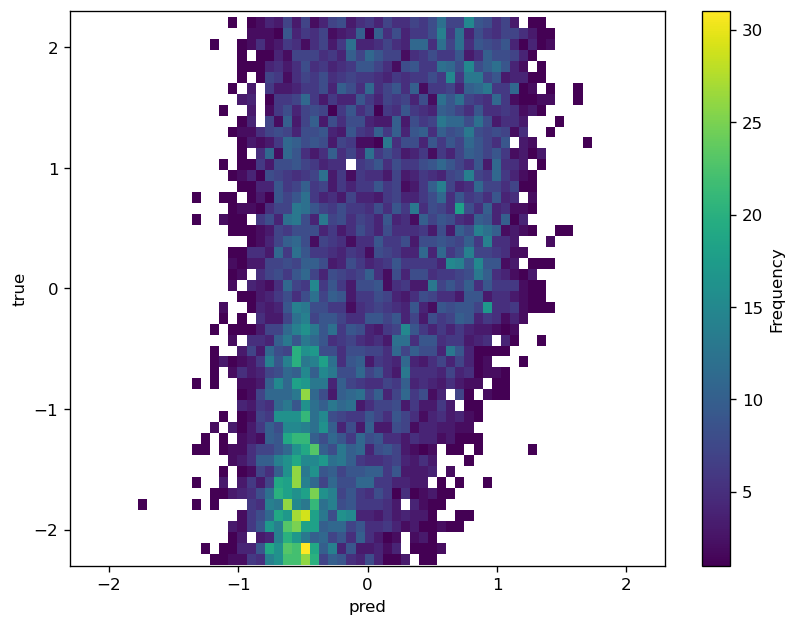

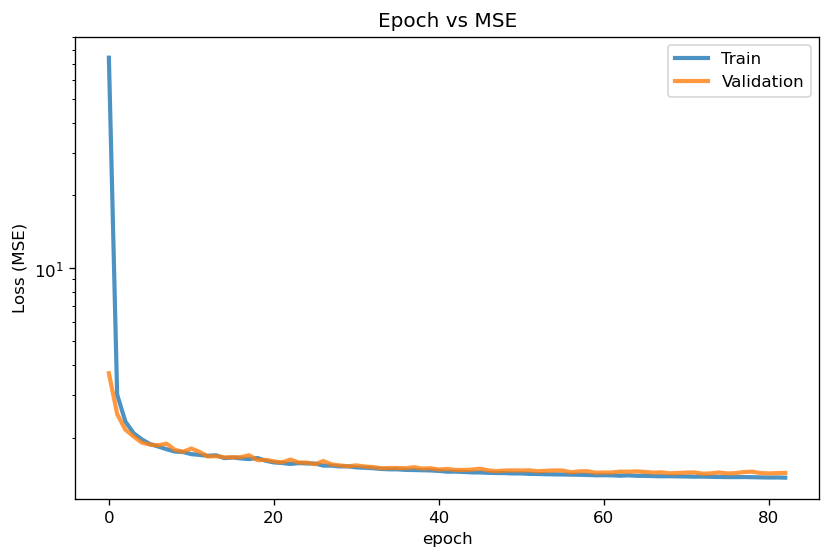

In [125]:
# Report the results
rmse = calculate_rmse(Bxy_pred, Bxy_test)
print(f"RMSE: {rmse}")
print(f"MAX of pred: {Bxy_pred.max()}; MIN of pred: {Bxy_pred.min()}")
print(f"MAX of test: {Bxy_test.max()}; MIN of test: {Bxy_test.min()}")

plot_2d_histogram(Bxy_pred, Bxy_test, bins=50)
plot_loss_history(history)